# Contrasting Death Predictions for covid19

[![video example](https://i.imgur.com/mD7qGK9.png)](http://www.youtube.com/watch?v=i9Cl55fZTw4)

## Predictions come from Youyang gu covid19-projections
<br>
<a href = 'https://covid19-projections.com/'>
    <img align="center" src="https://i.imgur.com/KRD3QRy.png">
</a>

## Data comes from Youyang respository:
* [covid19_projections](https://github.com/youyanggu/covid19_projections)
you'll need the 'projections' folder that's on the repository:

<a href = 'https://github.com/youyanggu/covid19_projections'>
    <img align="left" src="https://i.imgur.com/j7I7NZb.png">
</a>

In [1]:
import os
import calendar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio
from shutil import copy2
from IPython.display import Video, clear_output

from prediction_animation import clean_nan, eliminate_negatives, is_date, get_files, make_videos, get_posible_countries
    
#function to play the result video.
def play_video(country_name,dtype):
    return Video(f'results\{country_name}\{dtype}_{country_name.lower()}.mp4',width=900, height=400)

# To see a list of the posible countries to animate run get_posible_countries()

# This are the plotting functions

In [2]:
def plot_discrete(index, database, max_deaths, prediction, country_name):
    # discrete data changes the y limit often and that messes up the legend
    # so this (lim_data and max_y) are here to give some space on the top
    lim_data = max( clean_nan(database['discrete']) ) + ( max( clean_nan(database['discrete']))/ 2 )
    max_y = max(clean_nan(database['pred_discrete_upper'])) + max(clean_nan(database['pred_discrete_upper']))/2
    
    plt.close('all')
    plt.rcParams["figure.figsize"] = (14,6)
    plt.rcParams['figure.constrained_layout.use'] = True
    
    plt.plot(index, database['discrete'], label=f'real deaths {max_deaths}', linewidth=5, color = 'black')
    plt.plot(index, database['pred_discrete_low'],   label = f'low pred: {clean_nan(database["pred_cummulative_low"]  ) [-1]}')
    plt.plot(index, database['pred_discrete_mean'],  label = f'mean pred: {clean_nan(database["pred_cummulative_mean"] ) [-1]}')
    plt.plot(index, database['pred_discrete_upper'], label = f'top pred: {clean_nan(database["pred_cummulative_upper"]) [-1]}')
    
    plt.fill_between(index, database['pred_discrete_low'], database['pred_discrete_upper'], color='b', alpha=.1)
    
    plt.title(f' predicted deaths for September: {sum(clean_nan(database["pred_discrete_mean"])) }', fontsize=25,pad=20)
    plt.suptitle(f'{country_name.upper()}_{calendar.month_name[int(prediction[-9:-7])]}-{prediction[-6:-4]}', fontsize=20,ha='left',va='top')
    plt.ylabel('Deaths for Covid19')
    plt.ylim(0, max(max_y,lim_data))
    plt.legend(fontsize=20,loc=0)
    plt.xlabel(f'Real deaths: {max_deaths}', fontsize = 24)
    
    plt.savefig(f'plots/{country_name}/discrete/{prediction[-14:-4]}.jpg')
    
def plot_cummulative(index, database, max_deaths, prediction, country_name):
    
    plt.close('all')
    plt.rcParams["figure.figsize"] = (14,6)
    
    plt.plot(index, database['cummulative'], label=f'real deaths {max_deaths}', linewidth=5, color = 'black')
    plt.plot(index, database['pred_cummulative_low'],   label = f'low pred: {clean_nan(database["pred_cummulative_low"]  ) [-1]}')
    plt.plot(index, database['pred_cummulative_mean'],  label = f'mean pred: {clean_nan(database["pred_cummulative_mean"] ) [-1]}')
    plt.plot(index, database['pred_cummulative_upper'], label = f'top pred: {clean_nan(database["pred_cummulative_upper"]) [-1]}')
    
    plt.fill_between(index, database['pred_cummulative_low'], database['pred_cummulative_upper'], color='b', alpha=.1)
    
    plt.xlabel(f'Real deaths: {max_deaths}', fontsize = 24)
    plt.ylabel('Deaths for Covid19')
    plt.title(f' deaths for September: {max(clean_nan(database["pred_cummulative_mean"]))}', fontsize=25,pad=20)
    plt.suptitle(f'{country_name.upper()}_{calendar.month_name[int(prediction[-9:-7])]}-{prediction[-6:-4]}', fontsize=20,ha='left', va='top')
    plt.legend(fontsize=16,loc='upper left')

    
    plt.savefig(f'plots/{country_name}/cummulative/{prediction[-14:-4]}.jpg')

# This generates the database and sends it to plotting

In [3]:
def process_data(index, cummulative, discrete, prediction, country_name):
    
    pred = pd.read_csv(f'predictions/{country_name}/{prediction}')
    pred['date'] = pd.to_datetime(pred.date)
    
    database = {
        
        'cummulative': [],
        'discrete': [],
        'pred_cummulative_low':[],
        'pred_cummulative_mean':[],
        'pred_cummulative_upper':[],
        'pred_discrete_low': [],
        'pred_discrete_mean':[],
        'pred_discrete_upper':[],
    }
    
    for date in index:
        try:
            database['cummulative'].append(cummulative[cummulative.date == date].deaths.values[0])
        except:
            database['cummulative'].append(np.nan)
        try:
            database['discrete'].append(discrete[discrete.date == date].deaths.values[0])
        except:
            database['discrete'].append(np.nan)
        try:
            database['pred_cummulative_low'].append(pred[pred.date == date].predicted_total_deaths_lower.values[0])
        except:
            database['pred_cummulative_low'].append(np.nan)
        try:
            database['pred_cummulative_mean'].append(pred[pred.date == date].predicted_total_deaths_mean.values[0])
        except:
            database['pred_cummulative_mean'].append(np.nan)
        try:
            database['pred_cummulative_upper'].append(pred[pred.date == date].predicted_total_deaths_upper.values[0])
        except:
            database['pred_cummulative_upper'].append(np.nan)
        try:
            database['pred_discrete_low'].append(pred[pred.date == date].predicted_deaths_lower.values[0])
        except:
            database['pred_discrete_low'].append(np.nan)
        try:
            database['pred_discrete_mean'].append(pred[pred.date == date].predicted_deaths_mean.values[0])
        except:
            database['pred_discrete_mean'].append(np.nan)
        try:
            database['pred_discrete_upper'].append(pred[pred.date == date].predicted_deaths_upper.values[0])
        except:
            database['pred_discrete_upper'].append(np.nan)
    
    plot_cummulative(index, database, max(clean_nan(cummulative.deaths)), prediction, country_name)

    plot_discrete(index, database, max(clean_nan(cummulative.deaths)), prediction, country_name)

# This is the main funcition:
* Selects the country data and copies it to 'predictions/{country_name}' folder
* Creates de database for the real deaths of the newest data
* Send one by one the rest of the day by day data to process
* Takes the charts images and creates an mp4 with them

In [4]:
def get_animation(country_name):

    country_name = country_name.lower()

    get_files(country_name.capitalize())
        
    if not os.path.exists(f'plots/{country_name}/cummulative'):
        os.makedirs(f'plots/{country_name}/cummulative')
    if not os.path.exists(f'plots/{country_name}/discrete'):
        os.makedirs(f'plots/{country_name}/discrete')
    if not os.path.exists(f'results/{country_name}'):    
        os.makedirs(f'results/{country_name}')
    
    files_dir = os.listdir(f'predictions/{country_name}')
    
    oldest_file = min([pd.to_datetime(x[-14:-4]) for x in files_dir])
    newest_file = max([pd.to_datetime(x[-14:-4]) for x in files_dir])
    
    # Check if there are already plots for given country   
    if len(os.listdir(f'plots/{country_name}/cummulative')) > 0 or len(os.listdir(f'plots/{country_name}/discrete')) > 0:
        print(f'There is already plots for {country_name.upper()} please erase all plots and run again')
        return
    
    oldest_file= pd.read_csv(f'predictions/{country_name}/{country_name}_{str(oldest_file)[:10]}.csv')
    newest_file = pd.read_csv(f'predictions/{country_name}/{country_name}_{str(newest_file)[:10]}.csv')
        
    start_date = min(pd.to_datetime(oldest_file.date.copy()))
    end_date   = max(pd.to_datetime(newest_file.date.copy()))
    
    index = pd.date_range(start = start_date, end = end_date)
    
    cummulative = pd.DataFrame()
    cummulative['date'] = pd.to_datetime(newest_file.date.copy())
    cummulative['deaths']= newest_file.total_deaths
    cummulative = eliminate_negatives(cummulative)
    
    discrete = pd.DataFrame()
    discrete['date'] = pd.to_datetime(newest_file.date.copy())
    discrete['deaths']= newest_file.actual_deaths
    discrete = eliminate_negatives(discrete)
    
    for file in files_dir:
        process_data(index, cummulative, discrete, file, country_name)
        clear_output(wait=True)
        print('##########')
        print(f'{file[-14:-4]} ready...')
    
    print('##########')
    print('Processing final animations...')
    
    make_videos(country_name)
    

# To create an animation just pass the country name to the main function:

##########
2020-06-05 ready...
##########
Processing final animations...
##########
Cummulative animation ready...
##########
Discrete animation ready...
##########
Animations ready, con be found on:
results/us


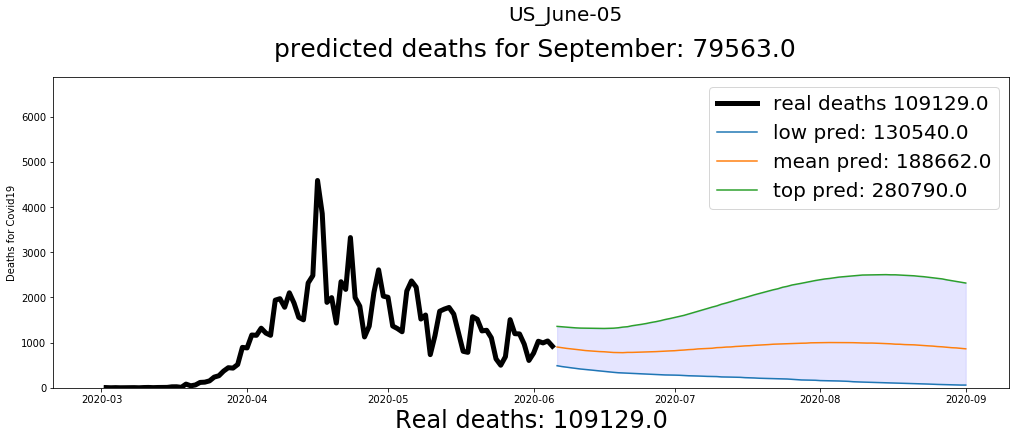

In [5]:
get_animation('Us')

## Play any result video:

### cummulative:

In [6]:
play_video('Us','cummulative')

### discrete:

In [7]:
play_video('Us','discrete')